# [MEDST-250] Stylometry

---
<img src="http://www.cleargoals.com/wp-content/uploads/2017/04/data-science-methods-and-algorithms-for-big-data.jpg" style="width: 500px; height: 275px;" />

### Professor X

This notebook is designed to reproduce several findings from Emily Thornbury's chapter "The Poet Alone" in her book Becoming a Poet in Anglo-Saxon England. In particular, Fig. 4.5 on page 170.

---

### Topics Covered
- Python Basics
- Analying Text
- Drawing Visualizations

### Table of Contents

1 - [Python Lists](#section 1)<br>

2 - [List Comprehensions](#section 2)<br>

3 - [Word Frequencies](#section 3)<br>

4 - [Visualization](#section 4)<br>

5 - [Ad Hoc Stylometry](#section 5)<br>

6 - [Homework: Acrostics](#section 6)<br>





**Dependencies:**

In [87]:
#! pip install datascience

## 1. Python Lists<a id='section 1'></a>

First, we're going to learn how to work with Python lists. Lists allow us to store words for easier manipulation later on. After all, how else can we count features of a string unless we can somehow make a list of items out of it?

Here's an example of a list:

In [39]:
["þæt", "wearð", "underne"]

['þæt', 'wearð', 'underne']

How do I know?

In [40]:
type(["þæt", "wearð", "underne"])

list

We can assign these to variables too!

In [41]:
first_hemistich = ["þæt", "wearð", "underne"]
second_hemistich = ["eorðbuendum"]
print(first_hemistich)
print(second_hemistich)

['þæt', 'wearð', 'underne']
['eorðbuendum']


And perform mathematical operations:


In [42]:
print(first_hemistich + second_hemistich)

['þæt', 'wearð', 'underne', 'eorðbuendum']


Let's assign that to first_line:

In [43]:
first_line = first_hemistich + second_hemistich
print(first_line)

['þæt', 'wearð', 'underne', 'eorðbuendum']


You can get the length of a list using the len function:


In [44]:
len(first_line)

4

You can index into lists with brackets [ ], let's get the first word of the first line:

#### NOTE: Python (and many other languages) start counting from 0!

In [45]:
print(first_line[0]) #Returns the first word 

þæt


In [46]:
print(first_line[1]) #Returns the second word 

wearð


You can get a range of elements using a semi-colon. Querying a range of elements from a list returns another list.

In [47]:
print(first_line[:2])
print(type(first_line[:2])) 

['þæt', 'wearð']
<class 'list'>


### Challenge 1:

Here's a small excercise to test your knowledge or python lists.
   1. Concatenate the first three lines of Christ and Satan.
   2. Retrieve the third element from the combined list.
   3. Retrieve the fourth through sixth elements from the combined list.

In [48]:
first_line = ['þæt', 'wearð', 'underne', 'eorðbuendum,']
second_line = ['þæt', 'meotod', 'hæfde', 'miht', 'and', 'strengðo']
third_line = ['ða', 'he', 'gefestnade', 'foldan', 'sceatas.']

In [49]:
#Do Your Work in this cell

#Question 1


#Question 2


#Question 3



## 2. List Comprehensions <a id='section 2'></a>

List comprehensions allow us to quickly and easily manipulate elements in a list without having to deal with loops. This can also involve removing and inserting items from a list. For example:

In [50]:
[word for word in first_line if "e" in word] #Using List Comprehension

['wearð', 'underne', 'eorðbuendum,']

##### INSTEAD OF:

In [51]:
has_e = []
for word in first_line:
    if "e" in word:
        has_e.append(word)
has_e

['wearð', 'underne', 'eorðbuendum,']

Now you know why list comprehensions are one of the best parts of Python!
In relation to text analysis, list comprehensions will come in handy when we want to parse and sift through text.

### Challenge 2:

Here's a small excercise to test your knowledge or python lists.
   1. Concatenate the first three lines of Christ and Satan.
   3. Create a new list that contains the first letter of each word.
   4. Create a new list that contains only words longer than two letters.

In [88]:
#Do Your Work in this cell

#Question 1


#Question 3


#Question 4



## 3. Word Frequencies  <a id='section 3'></a>

Lets get started with analyzing the different word frequencies in our text. Run the cell below to open up the text and read in into our notebook

In [54]:
with open('data/christ-and-satan.txt', 'r') as f:
    christ_and_satan = f.read()

In [55]:
tokens = christ_and_satan.split()

In [56]:
tokens

['þæt',
 'wearð',
 'underne',
 'eorðbuendum,',
 'þæt',
 'meotod',
 'hæfde',
 'miht',
 'and',
 'strengðo',
 'ða',
 'he',
 'gefestnade',
 'foldan',
 'sceatas.',
 'Seolfa',
 'he',
 'gesette',
 'sunnan',
 'and',
 'monan,',
 '5',
 'stanas',
 'and',
 'eorðan,',
 'stream',
 'ut',
 'on',
 'sæ,',
 'wæter',
 'and',
 'wolcn,',
 'ðurh',
 'his',
 'wundra',
 'miht.',
 'Deopne',
 'ymblyt',
 'clene',
 'ymbhaldeð',
 'meotod',
 'on',
 'mihtum,',
 'and',
 'alne',
 'middangeard.',
 'He',
 'selfa',
 'mæg',
 'sæ',
 'geondwlitan,',
 '10',
 'grundas',
 'in',
 'geofene,',
 'godes',
 'agen',
 'bearn,',
 'and',
 'he',
 'ariman',
 'mæg',
 'rægnas',
 'scuran,',
 'dropena',
 'gehwelcne.',
 'Daga',
 'enderim',
 'seolua',
 'he',
 'gesette',
 'þurh',
 'his',
 'soðan',
 'miht.',
 'Swa',
 'se',
 'wyrhta',
 'þurh',
 'his',
 'wuldres',
 'gast',
 '15',
 'serede',
 'and',
 'sette',
 'on',
 'six',
 'dagum',
 'eorðan',
 'dæles,',
 'up',
 'on',
 'heofonum,',
 'and',
 'heanne',
 'holm.',
 'Hwa',
 'is',
 'þæt',
 'ðe',
 'cunne',


Looks like a decent start. But we still have verse numbering in there, as well as some punctuation. What if we just want the words?

In [57]:
from string import punctuation, digits

In [58]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
digits

'0123456789'

Does it feel like time for a list comprehension? It should.

### Challenge 3
Write a list comprehension to remove line numbers and punctuation.

In [60]:
#Do Your Work Here



Python comes with the convenient Counter method from the collections library. It returns a dictionary like object that will return the frequency of a particular key.

In [61]:
from collections import Counter
cs_dict = Counter(tokens)

In [62]:
cs_dict

Counter({'ongean': 1,
         'lengust,': 1,
         'wolcna': 1,
         'þrym': 1,
         '185': 1,
         'he': 53,
         'rim': 1,
         'foldan,': 1,
         'dohtor,': 1,
         'Efe': 1,
         'sange.': 1,
         'sceoldon.': 2,
         'Hafað': 2,
         'læg': 1,
         'gast': 3,
         'song': 2,
         'heora,': 1,
         'Wendes': 1,
         'of,': 1,
         'winsele,': 1,
         'cyning': 5,
         'word,': 2,
         'wearð': 3,
         'dreamum': 2,
         'earmlic': 1,
         'ende.': 2,
         '455': 1,
         'uplicne': 1,
         'Sceolon': 1,
         'con."': 1,
         'cwealm,': 1,
         'deaðe': 1,
         '170': 1,
         'sorgum': 1,
         'andsacan.': 1,
         'þæt': 108,
         'sæ': 1,
         '440': 1,
         'geselle': 1,
         'scinað,': 1,
         'Wenað': 1,
         'þuhte': 1,
         '650': 1,
         'hatne': 2,
         'befæðmeð': 1,
         'heofonum': 7,
         'for':

In [63]:
cs_dict.keys()

dict_keys(['200', 'ongean', 'lengust,', 'wolcna', 'Ne', 'mihtum,', 'handum', 'egsan', '185', 'he', 'rim', 'utan', 'tacen', 'dohtor,', 'bræc', 'riht,', 'sange.', 'sceoldon.', 'gesawon,', 'sped.', '45', 'Hafað', 'ongin', 'unrim', 'geomre.', 'gast', 'seðe', 'ræd,', 'song', 'wirse', 'hælendes,', 'heora,', 'Wendes', 'laðe', 'teala!"', 'urnon,', 'leohtberende,', 'cyning', 'word,', 'wearð', 'eom', 'dreamum', 'ðy', 'ende.', 'underne', 'æne', 'esle', 'feondum', 'ahte', 'onwocon,', '455', 'uplicne', 'scræf,', 'con."', 'sæde', 'gelegdon', 'deaðe', '170', '180', 'onseon!', 'lyhteð', 'telgum,', 'reðre;', 'heo', 'habbað', 'heofencyninge', 'andsacan.', 'þæt', '720', 'seolfa,', 'beorhtan', 'fæste', 'geselle', 'forlæteð,', 'scinað,', 'folmum', 'Wenað', 'þuhte', '650', 'togenes', 'hatne', 'foldan,', 'tintregan', 'alles', 'feonda', 'attre', 'dreorig,', 'for', 'alda', 'hehselda', 'meotodes,', 'gewald', 'bendum,', 'eðles,', 'ymbfangen', 'leahtrum,', 'Wast', '190', '395', 'geþencan', 'ahof,', 'langsumne', '

In [64]:
cs_dict.values()

dict_values([1, 1, 1, 1, 6, 1, 5, 3, 1, 53, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 5, 2, 3, 4, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 17, 4, 2, 1, 108, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 4, 1, 4, 1, 17, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 3, 2, 1, 1, 1, 1, 1, 3, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 7, 1, 1, 1, 1, 2, 3, 1, 1, 1, 1, 1, 2, 9, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 7, 1, 1, 1, 1, 4, 2, 2, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 2, 8, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 5, 1, 1, 7, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 4, 2, 1, 1, 1, 65, 1, 1, 1, 1, 2, 

In [65]:
cs_dict.most_common()

[('and', 130),
 ('þæt', 108),
 ('on', 81),
 ('þa', 78),
 ('in', 67),
 ('to', 65),
 ('he', 53),
 ('mid', 46),
 ('ic', 45),
 ('þær', 36),
 ('se', 35),
 ('ne', 33),
 ('we', 33),
 ('is', 32),
 ('him', 30),
 ('þonne', 25),
 ('þe', 25),
 ('ær', 25),
 ('wæs', 25),
 ('wuldres', 23),
 ('his', 23),
 ('us', 21),
 ('up', 20),
 ('ðe', 20),
 ('nu', 20),
 ('þæs', 19),
 ('swa', 19),
 ('of', 19),
 ('þurh', 18),
 ('heo', 17),
 ('for', 17),
 ('ham', 17),
 ('drihten', 16),
 ('þam', 15),
 ('helle', 15),
 ('æfre', 15),
 ('engla', 15),
 ('ece', 13),
 ('þone', 13),
 ('geond', 13),
 ('me', 13),
 ('hie', 13),
 ('god', 13),
 ('godes', 13),
 ('uppe', 12),
 ('ymb', 12),
 ('ealle', 11),
 ('wordum', 11),
 ('þu', 11),
 ('agan', 11),
 ('drihten,', 11),
 ('hu', 10),
 ('Nu', 9),
 ('ah', 9),
 ('sceal', 9),
 ('meotod', 9),
 ('Eala', 9),
 ('eft', 8),
 ('eorðan', 8),
 ('ðu', 8),
 ('wunian', 8),
 ('eall', 8),
 ('sunu', 8),
 ('ða', 8),
 ('mot', 7),
 ('heran', 7),
 ('seolfa', 7),
 ('com', 7),
 ('heofonum', 7),
 ('wið', 7),
 ('

Believe it or not, even 1000 years ago "and" was still used all the time :) .

### Challenge 4¶

1. A common measure of lexical diversity for a given text is its Type-Token Ratio: the ratio of unique words (type) to number of all words (tokens) in the text. Calculate the Type-Token Ratio for Christ and Satan.

In [66]:
#Do Your Work in this cell




## 4. Visualization  <a id='section 4'></a>

Its time to draw up some visualizations to get a better sense of our data! Run the cell below to see the frequencies of different words. What can you infer from the graph?

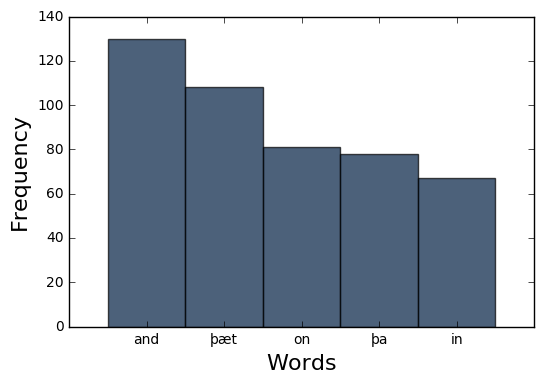

In [86]:
%matplotlib inline
from datascience import * #Importing Visualization libraries
import numpy as np

words, frequency = zip(*cs_dict.items())

t = Table(["Words", "Frequency"])
t.append_column("Words", words)
t.append_column("Frequency", frequency)
top_table = t.sort("Frequency", descending="True").take(np.arange(5))
top_table.bar(column_for_categories="Words")

## 5. Ad Hoc Stylometry  <a id='section 5'></a>

We can now put together our knowledge of strings, list comprehensions, and plotting frequencies to look at frequency of alliteration letters. Remember: Alliteration is the repetition of a sound at the beginning of two or more words in the same line.

Let's start by looking at the first letter of every word in the whole text:

In [70]:
#finds the frequencies of the first letter of every word
cs_tokens = christ_and_satan.lower().split()
first_letters = [x[0] if x[0] not in ['a','e','i','o','u','y'] else 'a' for x in cs_tokens]
first_l_dict = Counter(first_letters)
first_l_freq = first_l_dict.most_common()
print(first_l_freq)

[('a', 974), ('h', 531), ('þ', 451), ('s', 376), ('w', 369), ('g', 333), ('m', 239), ('f', 167), ('b', 155), ('d', 149), ('n', 133), ('t', 101), ('ð', 90), ('æ', 89), ('c', 83), ('l', 82), ('r', 34), ('5', 23), ('6', 22), ('4', 22), ('2', 22), ('3', 22), ('1', 22), ('"', 20), ('7', 8), ('(', 5), ('8', 2), ('p', 2), ('9', 2), ("'", 1)]


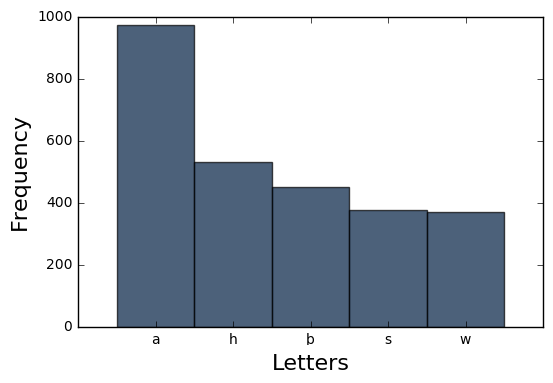

In [71]:
# plots the frequencies
letters, frequency = zip(*first_l_dict.items())

t = Table(["Letters", "Frequency"])
t.append_column("Letters", letters)
t.append_column("Frequency", frequency)
top_table = t.sort("Frequency", descending="True").take(np.arange(5))
top_table.bar(column_for_categories="Letters")

Cool! But we need it within a line, and Thornbury specifically does it for each Fitt. What's a "Fitt"? It's a further division in poetry constituted by a group of lines. Luckily this is nicely delimited by double line breaks (\n\n).

In [78]:
cs_fitts = christ_and_satan.split('\n\n') #splits up our text based on the location of double line breaks
cs_fitts[0] #lets just look at the first element for now

'þæt wearð underne      eorðbuendum, \nþæt meotod hæfde      miht and strengðo \nða he gefestnade      foldan sceatas. \nSeolfa he gesette      sunnan and monan, \n5\nstanas and eorðan,      stream ut on sæ, \nwæter and wolcn,      ðurh his wundra miht. \nDeopne ymblyt      clene ymbhaldeð \nmeotod on mihtum,      and alne middangeard. \nHe selfa mæg      sæ geondwlitan, \n10\ngrundas in geofene,      godes agen bearn, \nand he ariman mæg      rægnas scuran, \ndropena gehwelcne.      Daga enderim \nseolua he gesette      þurh his soðan miht. \nSwa se wyrhta      þurh his wuldres gast \n15\nserede and sette      on six dagum \neorðan dæles,      up on heofonum, \nand heanne holm.      Hwa is þæt ðe cunne \norðonc clene      nymðe ece god? \nDreamas he gedelde,      duguðe and geþeode, \n20\nAdam ærest,      and þæt æðele cyn, \nengla ordfruman,      þæt þe eft forwarð. \nðuhte him on mode      þæt hit mihte swa, \nþæt hie weron seolfe      swegles brytan, \nwuldres waldend.      Him ðær

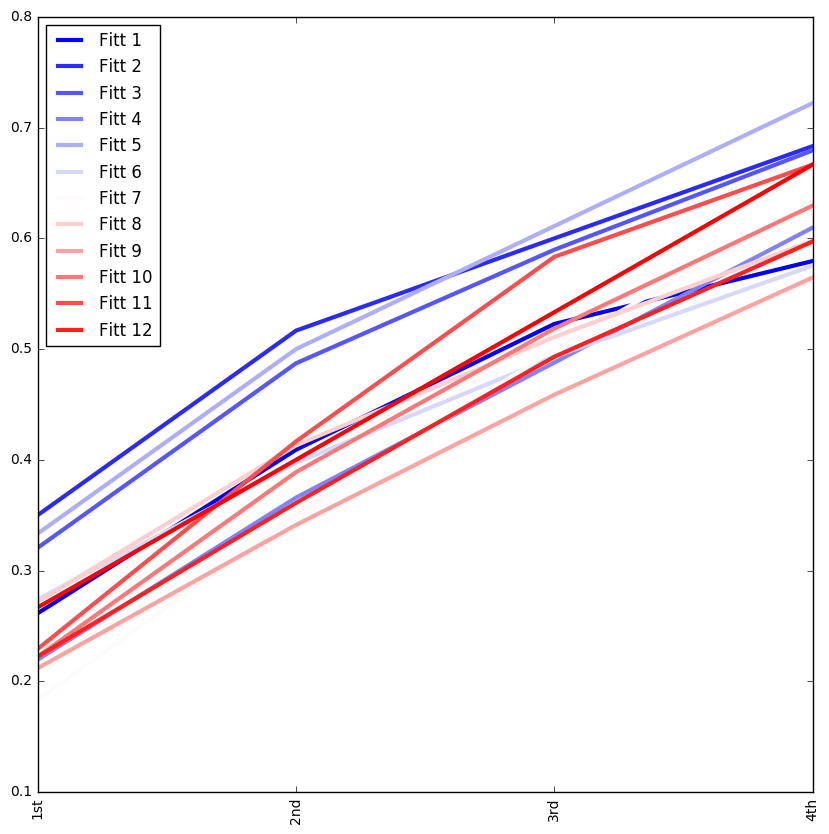

In [79]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (10,10))

# iterate through fitts
for i in range(len(cs_fitts)):
    
    # lowercase the string and get the tokens for each line back
    fitt_tokens = [l.split() for l in cs_fitts[i].lower().split('\n')]
    
    # collect letter of most freq alliteration
    most_freq_allit = []
    
    # cycle through lines
    for l in fitt_tokens:
        
        # get first letter of all words in line
        first_letters = [x[0] if x[0] not in ['a','e','i','o','u','y'] else 'a' for x in l]
        
        # count freq of all first letters
        allit_freq = Counter(first_letters).most_common()
        try:
            # append most freq letter (alliterated letter) to list for all lines
            most_freq_allit.append(allit_freq[0][0])
        except:
            pass
    
    # use Counter to get the most common alliterations
    allit_freq = Counter(most_freq_allit).most_common()

    # need keys for x axis
    common_keys = [x[0] for x in allit_freq]
    
    # need values for y axes
    common_values = [x[1] for x in allit_freq]
    
    # normalize so we can compare across Fitts despite different number of words
    normed_values = [x[1]/sum(common_values) for x in allit_freq]
    
    # add up to get cumulative alliteration of the four most preferred patterns
    cumulative_values = np.cumsum(normed_values)

    # add the Fitt to the plot
    plt.xticks(range(4), ['1st','2nd','3rd','4th'], rotation='vertical')
    plt.plot(cumulative_values[:4], color = plt.cm.bwr(i*.085), lw=3)
plt.legend(labels=['Fitt '+str(i+1) for i in range(12)], loc=0)
plt.show()

What do you notice about the graph? What conclusions can you draw? Double click the next cell to write your answer

#### Answer: 

## 6. Homework: Acrostics  <a id='section 6'></a>

In poetry, an acrostic is a message created by taking certain letters in a pattern over lines. One 9th century German writer, Otfrid of Weissenburg, was notorius for his early use of acrostics, one instance of which is in the text below: Salomoni episcopo Otfridus. His message can be found by taking the first character of every other line. Print Otfrid's message!

Source: http://titus.uni-frankfurt.de/texte/etcs/germ/ahd/otfrid/otfri.htm

In [80]:
text = '''si sálida gimúati      sálomones gúati, 
     ther bíscof ist nu édiles      kóstinzero sédales; 
     allo gúati gidúe thio sín,      thio bíscofa er thar hábetin, 
     ther ínan zi thiu giládota,      in hóubit sinaz zuívalta! 
     lékza ih therera búachi      iu sentu in suábo richi, 
     thaz ir irkíaset ubar ál,      oba siu frúma wesan scal; 
     oba ir hiar fíndet iawiht thés      thaz wírdig ist thes lésannes: 
     iz iuer húgu irwállo,      wísduames fóllo. 
     mir wárun thio iuo wízzi      ju ófto filu núzzi, 
     íueraz wísduam;      thes duan ih míhilan ruam. 
     ófto irhugg ih múates      thes mánagfalten gúates, 
     thaz ír mih lértut hárto      íues selbes wórto. 
     ni thaz míno dohti      giwérkon thaz io móhti, 
     odo in thén thingon      thio húldi so gilángon; 
     iz datun gómaheiti,      thio íues selbes gúati, 
     íueraz giráti,      nales míno dati. 
     emmizen nu ubar ál      ih druhtin férgon scal, 
     mit lón er iu iz firgélte      joh sínes selbes wórte; 
     páradyses résti      gébe iu zi gilústi; 
     ungilónot ni biléip      ther gotes wízzode kleip. 
     in hímilriches scóne      so wérde iz iu zi lóne 
     mit géltes ginúhti,      thaz ír mir datut zúhti. 
     sínt in thesemo búache,      thes gómo theheiner rúache; 
     wórtes odo gúates,      thaz lích iu iues múates: 
     chéret thaz in múate      bi thia zúhti iu zi gúate, 
     joh zellet tház ana wánc      al in íuweran thanc. 
     ofto wírdit, oba gúat      thes mannes júngoro giduat, 
     thaz es líwit thráto      ther zúhtari gúato. 
     pétrus ther rícho      lono iu es blídlicho, 
     themo zi rómu druhtin gráp      joh hús inti hóf gap; 
     óbana fon hímile      sént iu io zi gámane 
     sálida gimýato      selbo kríst ther gúato! 
     oba ih irbálden es gidár,      ni scal ih firlázan iz ouh ál, 
     nub ih ío bi iuih gerno      gináda sina férgo, 
     thaz hóh er iuo wírdi      mit sínes selbes húldi, 
     joh iu féstino in thaz múat      thaz sinaz mánagfalta gúat; 
     firlíhe iu sines ríches,      thes hohen hímilriches, 
     bi thaz ther gúato hiar io wíaf      joh émmizen zi góte riaf; 
     rihte íue pédi thara frúa      joh míh gifúage tharazúa, 
     tház wir unsih fréwen thar      thaz gotes éwiniga jár, 
     in hímile unsih blíden,      thaz wízi wir bimíden; 
     joh dúe uns thaz gimúati      thúruh thio síno guati! 
     dúe uns thaz zi gúate      blídemo múate! 
     mit héilu er gibóran ward,      ther io thia sálida thar fand, 
     uuanta es ni brístit furdir      (thes gilóube man mír), 
     nirfréwe sih mit múatu      íamer thar mit gúatu. 
     sélbo krist ther guato      firlíhe uns hiar gimúato, 
     wir íamer fro sin múates      thes éwinigen gúates!'''

In [84]:
# HINT: remember what % does, (maybe) lookup enumerate
#Do Your Work in this cell





Otfrid was more skillful than to settle for the first letter of every other line. What happens if you extract the last letter of the last word of each line, for every other line starting on the second line?

In [85]:
# HINT: first remove punctuation, tab is represented by \t
#Do Your Work in this cell
from string import punctuation





---
Notebook developed by: Shubham Gupta

Data Science Modules: http://data.berkeley.edu/education/modules
